<a href="https://colab.research.google.com/github/Suriya6744/Project/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Data

##PTT

In [1]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ptt = pd.read_csv('/content/drive/MyDrive/Project1/PTT.csv')
ptt.shape

(241, 7)

In [5]:
ptt.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,4/1/2022,38.00,38.25,38.50,38.00,59.50M,0.00%
1,5/1/2022,39.00,38.25,39.00,38.00,76.59M,2.63%
2,6/1/2022,38.00,38.50,38.75,38.00,71.68M,-2.56%
3,7/1/2022,38.75,38.50,38.75,38.25,59.56M,1.97%
4,10/1/2022,38.50,38.75,38.75,38.00,34.79M,-0.65%


In [6]:
ptt.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [7]:
ptt=ptt[['วันเดือนปี','ล่าสุด','ปริมาณ']]
ptt

,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,38.00,59.50M
1,5/1/2022,39.00,76.59M
2,6/1/2022,38.00,71.68M
3,7/1/2022,38.75,59.56M
4,10/1/2022,38.50,34.79M
...,...,...,...
236,26/12/2022,32.25,39.66M
237,27/12/2022,32.50,80.79M
238,28/12/2022,32.75,49.82M
239,29/12/2022,32.75,61.35M


In [8]:
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(str)


In [9]:
ptt.dtypes

วันเดือนปี     object
ล่าสุด        float64
ปริมาณ         object
dtype: object

In [10]:
ptt['ปริมาณ'] = ptt['ปริมาณ'].str.replace('M', '', regex=True)

In [11]:
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(float)

In [12]:
# สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
def multiply_by_million(value):
    return value * 1000000

In [13]:
# ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
ptt['ปริมาณ']=ptt['ปริมาณ'].apply(multiply_by_million)


In [14]:
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(int)
ptt

,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,38.00,59500000
1,5/1/2022,39.00,76590000
2,6/1/2022,38.00,71680000
3,7/1/2022,38.75,59560000
4,10/1/2022,38.50,34790000
...,...,...,...
236,26/12/2022,32.25,39660000
237,27/12/2022,32.50,80790000
238,28/12/2022,32.75,49820000
239,29/12/2022,32.75,61350000


In [15]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
ptt =ptt.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ptt',
                        'ปริมาณ': 'vol_ptt'})
ptt

,date,cp_ptt,vol_ptt
0,4/1/2022,38.00,59500000
1,5/1/2022,39.00,76590000
2,6/1/2022,38.00,71680000
3,7/1/2022,38.75,59560000
4,10/1/2022,38.50,34790000
...,...,...,...
236,26/12/2022,32.25,39660000
237,27/12/2022,32.50,80790000
238,28/12/2022,32.75,49820000
239,29/12/2022,32.75,61350000


##SCG

In [16]:
scg = pd.read_csv('/content/drive/MyDrive/Project1/SCG.csv')
scg.shape


(241, 7)

In [17]:
scg.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [18]:
scg=scg[['วันเดือนปี','ล่าสุด','ปริมาณ']]
scg

,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,6.15,183.00K
1,5/1/2022,6.25,1.15M
2,6/1/2022,6.10,133.50K
3,7/1/2022,6.10,205.10K
4,10/1/2022,6.15,144.40K
...,...,...,...
236,26/12/2022,4.80,37.00K
237,27/12/2022,4.84,62.50K
238,28/12/2022,4.86,41.50K
239,29/12/2022,4.88,47.90K


In [19]:
#scg['ปริมาณ']=scg['ปริมาณ'].astype(str)

In [20]:
scg.dtypes

วันเดือนปี     object
ล่าสุด        float64
ปริมาณ         object
dtype: object

In [21]:
# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
scg['ปริมาณ'] = scg['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)


<ipython-input-21-9537f888f457>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scg['ปริมาณ'] = scg['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)


In [22]:
scg['ปริมาณ']=scg['ปริมาณ'].astype(int)
scg


<ipython-input-22-1706cc465d6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scg['ปริมาณ']=scg['ปริมาณ'].astype(int)


,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,6.15,183000
1,5/1/2022,6.25,1150000
2,6/1/2022,6.10,133500
3,7/1/2022,6.10,205100
4,10/1/2022,6.15,144400
...,...,...,...
236,26/12/2022,4.80,37000
237,27/12/2022,4.84,62500
238,28/12/2022,4.86,41500
239,29/12/2022,4.88,47900


In [23]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
scg=scg.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_scg',
                        'ปริมาณ': 'vol_scg'})
scg

,date,cp_scg,vol_scg
0,4/1/2022,6.15,183000
1,5/1/2022,6.25,1150000
2,6/1/2022,6.10,133500
3,7/1/2022,6.10,205100
4,10/1/2022,6.15,144400
...,...,...,...
236,26/12/2022,4.80,37000
237,27/12/2022,4.84,62500
238,28/12/2022,4.86,41500
239,29/12/2022,4.88,47900


##SOLAR

In [24]:
solar = pd.read_csv('/content/drive/MyDrive/Project1/SOLAR.csv')
solar.shape


(241, 7)

In [25]:
solar.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [26]:
solar=solar[['วันเดือนปี','ล่าสุด','ปริมาณ']]
solar

,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,1.51,9.13M
1,5/1/2022,1.51,4.25M
2,6/1/2022,1.44,9.95M
3,7/1/2022,1.24,93.48M
4,10/1/2022,1.24,21.28M
...,...,...,...
236,26/12/2022,0.87,1.06M
237,27/12/2022,0.89,1.46M
238,28/12/2022,0.88,291.80K
239,29/12/2022,0.88,1.05M


In [27]:
solar.dtypes

วันเดือนปี     object
ล่าสุด        float64
ปริมาณ         object
dtype: object

In [28]:
# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
solar['ปริมาณ'] = solar['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)


<ipython-input-28-e393438ad476>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar['ปริมาณ'] = solar['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)


In [29]:
solar['ปริมาณ']=solar['ปริมาณ'].astype(int)
solar


<ipython-input-29-3b0796bd1e20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar['ปริมาณ']=solar['ปริมาณ'].astype(int)


,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,1.51,9130000
1,5/1/2022,1.51,4250000
2,6/1/2022,1.44,9950000
3,7/1/2022,1.24,93480000
4,10/1/2022,1.24,21280000
...,...,...,...
236,26/12/2022,0.87,1060000
237,27/12/2022,0.89,1460000
238,28/12/2022,0.88,291800
239,29/12/2022,0.88,1050000


In [30]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
solar=solar.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_solar',
                        'ปริมาณ': 'vol_solar'})
solar

,date,cp_solar,vol_solar
0,4/1/2022,1.51,9130000
1,5/1/2022,1.51,4250000
2,6/1/2022,1.44,9950000
3,7/1/2022,1.24,93480000
4,10/1/2022,1.24,21280000
...,...,...,...
236,26/12/2022,0.87,1060000
237,27/12/2022,0.89,1460000
238,28/12/2022,0.88,291800
239,29/12/2022,0.88,1050000


##USD

In [31]:
usd = pd.read_csv('/content/drive/MyDrive/Project1/USD_THB.csv')
usd.shape

(260, 7)

In [32]:
usd.head()


,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,3/1/2022,33.24,33.24,33.370,33.130,NaN,0.03%
1,4/1/2022,33.25,33.24,33.365,33.225,NaN,0.03%
2,5/1/2022,33.19,33.26,33.290,33.120,NaN,-0.18%
3,6/1/2022,33.55,33.21,33.595,33.210,NaN,1.08%
4,7/1/2022,33.62,33.56,33.740,33.470,NaN,0.21%


In [33]:
usd=usd[['วันเดือนปี','ล่าสุด']]
usd

,วันเดือนปี,ล่าสุด
0,3/1/2022,33.24
1,4/1/2022,33.25
2,5/1/2022,33.19
3,6/1/2022,33.55
4,7/1/2022,33.62
...,...,...
255,26/12/2022,34.69
256,27/12/2022,34.60
257,28/12/2022,34.78
258,29/12/2022,34.62


In [34]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
usd =usd .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_usd'})
usd

,date,cp_usd
0,3/1/2022,33.24
1,4/1/2022,33.25
2,5/1/2022,33.19
3,6/1/2022,33.55
4,7/1/2022,33.62
...,...,...
255,26/12/2022,34.69
256,27/12/2022,34.60
257,28/12/2022,34.78
258,29/12/2022,34.62


##WTI

In [35]:
wti = pd.read_csv('/content/drive/MyDrive/Project1/WTI_USD.csv')
wti.shape

(310, 7)

In [36]:
wti=wti[['วันเดือนปี','ล่าสุด']]
wti

,วันเดือนปี,ล่าสุด
0,2/1/2022,76.03
1,3/1/2022,76.17
2,4/1/2022,77.25
3,5/1/2022,77.39
4,6/1/2022,79.69
...,...,...
305,26/12/2022,81.06
306,27/12/2022,79.84
307,28/12/2022,78.67
308,29/12/2022,78.67


In [37]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
wti =wti .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_wti'})
wti

,date,cp_wti
0,2/1/2022,76.03
1,3/1/2022,76.17
2,4/1/2022,77.25
3,5/1/2022,77.39
4,6/1/2022,79.69
...,...,...
305,26/12/2022,81.06
306,27/12/2022,79.84
307,28/12/2022,78.67
308,29/12/2022,78.67


##XAU

In [38]:
xau = pd.read_csv('/content/drive/MyDrive/Project1/XAU_USD.csv')
xau.shape

(260, 7)

In [39]:
xau=xau[['วันเดือนปี','ล่าสุด']]
xau

,วันเดือนปี,ล่าสุด
0,3/1/2022,"1,800.85"
1,4/1/2022,"1,814.56"
2,5/1/2022,"1,809.53"
3,6/1/2022,"1,788.68"
4,7/1/2022,"1,795.63"
...,...,...
255,26/12/2022,"1,797.61"
256,27/12/2022,"1,813.93"
257,28/12/2022,"1,804.09"
258,29/12/2022,"1,814.89"


In [40]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
xau =xau .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_xau'})
xau

,date,cp_xau
0,3/1/2022,"1,800.85"
1,4/1/2022,"1,814.56"
2,5/1/2022,"1,809.53"
3,6/1/2022,"1,788.68"
4,7/1/2022,"1,795.63"
...,...,...
255,26/12/2022,"1,797.61"
256,27/12/2022,"1,813.93"
257,28/12/2022,"1,804.09"
258,29/12/2022,"1,814.89"


#Merge

In [41]:
tm1 = wti.merge(usd, how ='left', left_on=['date',], right_on=['date',])
tm1

,date,cp_wti,cp_usd
0,2/1/2022,76.03,NaN
1,3/1/2022,76.17,33.24
2,4/1/2022,77.25,33.25
3,5/1/2022,77.39,33.19
4,6/1/2022,79.69,33.55
...,...,...,...
305,26/12/2022,81.06,34.69
306,27/12/2022,79.84,34.60
307,28/12/2022,78.67,34.78
308,29/12/2022,78.67,34.62


In [42]:
tm2 = tm1.merge(xau, how ='left', left_on=['date',], right_on=['date',])
tm2

,date,cp_wti,cp_usd,cp_xau
0,2/1/2022,76.03,NaN,NaN
1,3/1/2022,76.17,33.24,"1,800.85"
2,4/1/2022,77.25,33.25,"1,814.56"
3,5/1/2022,77.39,33.19,"1,809.53"
4,6/1/2022,79.69,33.55,"1,788.68"
...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61"
306,27/12/2022,79.84,34.60,"1,813.93"
307,28/12/2022,78.67,34.78,"1,804.09"
308,29/12/2022,78.67,34.62,"1,814.89"


In [43]:
tm3 = tm2.merge(ptt, how ='left', left_on=['date',], right_on=['date',])
tm3

,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt
0,2/1/2022,76.03,NaN,NaN,NaN,NaN
1,3/1/2022,76.17,33.24,"1,800.85",NaN,NaN
2,4/1/2022,77.25,33.25,"1,814.56",38.00,59500000.0
3,5/1/2022,77.39,33.19,"1,809.53",39.00,76590000.0
4,6/1/2022,79.69,33.55,"1,788.68",38.00,71680000.0
...,...,...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61",32.25,39660000.0
306,27/12/2022,79.84,34.60,"1,813.93",32.50,80790000.0
307,28/12/2022,78.67,34.78,"1,804.09",32.75,49820000.0
308,29/12/2022,78.67,34.62,"1,814.89",32.75,61350000.0


In [44]:
tm4 = tm3.merge(scg, how ='left', left_on=['date',], right_on=['date',])
tm4

,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg
0,2/1/2022,76.03,NaN,NaN,NaN,NaN,NaN,NaN
1,3/1/2022,76.17,33.24,"1,800.85",NaN,NaN,NaN,NaN
2,4/1/2022,77.25,33.25,"1,814.56",38.00,59500000.0,6.15,183000.0
3,5/1/2022,77.39,33.19,"1,809.53",39.00,76590000.0,6.25,1150000.0
4,6/1/2022,79.69,33.55,"1,788.68",38.00,71680000.0,6.10,133500.0
...,...,...,...,...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61",32.25,39660000.0,4.80,37000.0
306,27/12/2022,79.84,34.60,"1,813.93",32.50,80790000.0,4.84,62500.0
307,28/12/2022,78.67,34.78,"1,804.09",32.75,49820000.0,4.86,41500.0
308,29/12/2022,78.67,34.62,"1,814.89",32.75,61350000.0,4.88,47900.0


In [45]:
tm5 = tm4.merge(solar, how ='left', left_on=['date',], right_on=['date',])
tm5

,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,2/1/2022,76.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/1/2022,76.17,33.24,"1,800.85",NaN,NaN,NaN,NaN,NaN,NaN
2,4/1/2022,77.25,33.25,"1,814.56",38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5/1/2022,77.39,33.19,"1,809.53",39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6/1/2022,79.69,33.55,"1,788.68",38.00,71680000.0,6.10,133500.0,1.44,9950000.0
...,...,...,...,...,...,...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61",32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27/12/2022,79.84,34.60,"1,813.93",32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28/12/2022,78.67,34.78,"1,804.09",32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29/12/2022,78.67,34.62,"1,814.89",32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [46]:
tm5.isnull().any()

date         False
cp_wti       False
cp_usd        True
cp_xau        True
cp_ptt        True
vol_ptt       True
cp_scg        True
vol_scg       True
cp_solar      True
vol_solar     True
dtype: bool

In [47]:
all_data= tm5.dropna()
all_data


,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
2,4/1/2022,77.25,33.25,"1,814.56",38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5/1/2022,77.39,33.19,"1,809.53",39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6/1/2022,79.69,33.55,"1,788.68",38.00,71680000.0,6.10,133500.0,1.44,9950000.0
5,7/1/2022,79.07,33.62,"1,795.63",38.75,59560000.0,6.10,205100.0,1.24,93480000.0
7,10/1/2022,78.70,33.62,"1,801.41",38.50,34790000.0,6.15,144400.0,1.24,21280000.0
...,...,...,...,...,...,...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61",32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27/12/2022,79.84,34.60,"1,813.93",32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28/12/2022,78.67,34.78,"1,804.09",32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29/12/2022,78.67,34.62,"1,814.89",32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [48]:
all_data['cp_xau'] = all_data['cp_xau'].str.replace(',', '').astype(float)

<ipython-input-48-9b1f2f07f0b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cp_xau'] = all_data['cp_xau'].str.replace(',', '').astype(float)


In [49]:
all_data['date'] = all_data['date'].str.replace('/', '-')

<ipython-input-49-f8a975dcb8ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['date'] = all_data['date'].str.replace('/', '-')


In [50]:
# คูณคอลัมน์ 'cp_wti' ด้วยคอลัมน์ 'cp_usd' เพื่อแปลงเป็นเงินบาท
all_data['cp_wti'] = all_data['cp_wti'] * all_data['cp_usd']
# คูณคอลัมน์ 'cp_xau ด้วยคอลัมน์ 'cp_usd' เพื่อแปลงเป็นเงินบาท
all_data['cp_xau'] = all_data['cp_xau'] * all_data['cp_usd']

<ipython-input-50-9cb9b54d5d83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cp_wti'] = all_data['cp_wti'] * all_data['cp_usd']
<ipython-input-50-9cb9b54d5d83>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cp_xau'] = all_data['cp_xau'] * all_data['cp_usd']


In [51]:
# # คูณคอลัมน์ 'cp_wti' ด้วยคอลัมน์ 'cp_usd' เพื่อแปลงเป็นเงินบาท
# all_data['cp_wti_in_baht'] = all_data['cp_wti'] * all_data['cp_usd']

# # แสดงข้อมูลหลังจากการแปลง
# print(all_data.head())


In [52]:
# save data
#all_data.to_csv('Project_data.csv', index=False)


#LSTM Model

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [54]:
lm = all_data[['date','cp_ptt','cp_wti','cp_usd','cp_xau','vol_ptt']]
lm

,date,cp_ptt,cp_wti,cp_usd,cp_xau,vol_ptt
2,4-1-2022,38.00,2568.5625,33.25,60334.1200,59500000.0
3,5-1-2022,39.00,2568.5741,33.19,60058.3007,76590000.0
4,6-1-2022,38.00,2673.5995,33.55,60010.2140,71680000.0
5,7-1-2022,38.75,2658.3334,33.62,60369.0806,59560000.0
7,10-1-2022,38.50,2645.8940,33.62,60563.4042,34790000.0
...,...,...,...,...,...,...
305,26-12-2022,32.25,2811.9714,34.69,62359.0909,39660000.0
306,27-12-2022,32.50,2762.4640,34.60,62761.9780,80790000.0
307,28-12-2022,32.75,2736.1426,34.78,62746.2502,49820000.0
308,29-12-2022,32.75,2723.5554,34.62,62831.4918,61350000.0


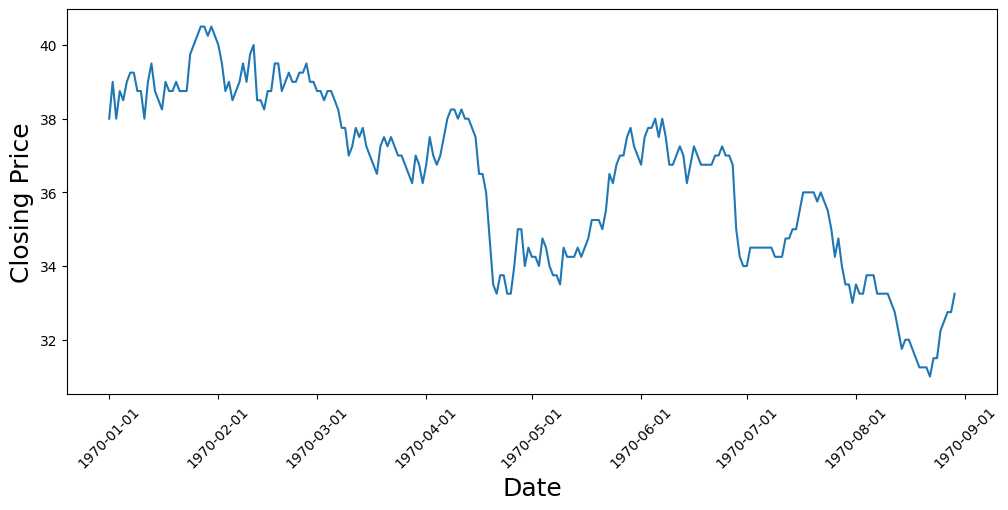

In [55]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
plt.plot(range(len(lm)), lm['cp_ptt'])
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.show()


In [82]:
# สมมติว่าคุณมีข้อมูล X_train, y_train และ X_test, y_test
X = lm[['cp_wti','cp_usd','cp_xau','vol_ptt']]
y = lm['cp_ptt']
# แบ่งข้อมูลเป็นชุดการฝึกและชุดทดสอบ 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=)

In [76]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split


# สมมติว่าคุณมีข้อมูล X_train, y_train และ X_test, y_test
X = lm[['cp_wti','cp_usd','cp_xau','vol_ptt']]
y = lm['cp_ptt']
# แบ่งข้อมูลเป็นชุดการฝึกและชุดทดสอบ 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# สร้างฟังก์ชันสำหรับการสร้างโมเดล LSTM
def create_lstm_model(neurons=150, dense_units=50):
    model = Sequential()
    model.add(LSTM(neurons, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(neurons, return_sequences=False))
    model.add(Dense(dense_units))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# กำหนดค่าที่ต้องการทดลอง
param_grid = {
    'neurons': [50, 100, 150],
    'dense_units': [25, 50, 75],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 200]
}

# สร้าง KerasRegressor
model = KerasRegressor(build_fn=create_lstm_model, verbose=0)

# ใช้ GridSearchCV ในการค้นหาพารามิเตอร์ที่ดีที่สุด
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)
grid_result = grid.fit(X_train, y_train)

# แสดงผลลัพธ์ที่ดีที่สุด
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



ModuleNotFoundError: ignored

In [ ]:
#กำหนดมีชั้น LSTM มากกว่าหนึ่งชั้นต่อกัน return_sequences=True
#ให้ผลลัพธ์เป็นเวกเตอร์เดียวสำหรับชั้นถัดไป return_sequences=False
#จำนวนฟีเจอร์ xtrain.shape[1], ช่วงเวลาที่ต้องการทำนาย 1
# สร้างโมเดล LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(150, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))
model.summary()


In [72]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=200) #epochs กำหนดจำนวนรอบการฝึกทั้งหมด  batch size ขนาดของกลุ่มข้อมูล ในแต่ละรอบการฝึก

Epoch 1/200
6/6 [==============================] - 6s 18ms/step - loss: 1208.5140
Epoch 2/200
6/6 [==============================] - 0s 17ms/step - loss: 735.3837
Epoch 3/200
6/6 [==============================] - 0s 17ms/step - loss: 227.9060
Epoch 4/200
6/6 [==============================] - 0s 16ms/step - loss: 15.2158
Epoch 5/200
6/6 [==============================] - 0s 16ms/step - loss: 36.0903
Epoch 6/200
6/6 [==============================] - 0s 17ms/step - loss: 30.4876
Epoch 7/200
6/6 [==============================] - 0s 19ms/step - loss: 6.9635
Epoch 8/200
6/6 [==============================] - 0s 17ms/step - loss: 5.8083
Epoch 9/200
6/6 [==============================] - 0s 17ms/step - loss: 7.7997
Epoch 10/200
6/6 [==============================] - 0s 17ms/step - loss: 4.7810
Epoch 11/200
6/6 [==============================] - 0s 17ms/step - loss: 3.6696
Epoch 12/200
6/6 [==============================] - 0s 17ms/step - loss: 4.1581
Epoch 13/200
6/6 [=====================

KeyboardInterrupt: ignored

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import TimeSeriesSplit
# from keras.models import Sequential
# from keras.layers import LSTM, Dense

# # สร้างฟังก์ชันสำหรับสร้างโมเดล LSTM
# def create_lstm_model(units_lstm1=200, units_lstm2=100, units_dense=50):
#     model = Sequential()
#     model.add(LSTM(units=units_lstm1, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
#     model.add(LSTM(units=units_lstm2, return_sequences=False))
#     model.add(Dense(units=units_dense))
#     model.add(Dense(units=1))
#     model.compile(optimizer='adam', loss='mean_squared_error')
#     return model

# # กำหนดค่าที่คุณต้องการทดสอบ
# param_grid = {
#     'units_lstm1': [100, 200],
#     'units_lstm2': [100, 150],
#     'units_dense': [25, 50],
#     'batch_size': [1, 32],
#     'epochs': [50, 60],
# }

# # ใช้ Time Series Cross Validation
# tscv = TimeSeriesSplit(n_splits=3)  # ใช้จำนวน Fold ตามที่คุณต้องการ

# # สร้าง GridSearchCV เพื่อค้นหา parameter ที่ดีที่สุด
# model = KerasRegressor(build_fn=create_lstm_model, verbose=0)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=2)
# grid_result = grid.fit(xtrain, ytrain)

# # แสดงผลลัพธ์ parameter ที่ดีที่สุด
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [ ]:
from sklearn.metrics import mean_squared_error
# ทำนายค่าจากชุดทดสอบ
y_pred = model.predict(xtest)
y_pred

In [ ]:
#from sklearn.metrics import mean_squared_error

# ทำนายค่าจากชุดทดสอบ
#y_pred = model.predict(xtest)

# คำนวณค่า MSE
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error (MSE): {mse*100}")


In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
#plt.plot(range(len(lm)), lm['cp_ptt'])
plt.plot(ytest, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.show()


In [ ]:
# import arch
# import pandas as pd
# import numpy as np

# # แบ่งข้อมูลเป็นชุดการฝึกอบรมและชุดทดสอบ
# train_size = int(len(ai) * 0.8)
# train_data = ai.iloc[:train_size]
# test_data = ai.iloc[train_size:]

# # สร้างและฟิตโมเดล GARCH(2,3) ด้วยข้อมูลการฝึกอบรม
# garch_order = (1, 1)
# model_garch = arch.arch_model(train_data['cp_ptt'], x=train_data[['cp_wti', 'cp_usd', 'cp_xau', 'vol_ptt']],
#                              vol='Garch', p=garch_order[0], q=garch_order[1])
# results_garch = model_garch.fit()

# # ใช้โมเดล GARCH ที่ฟิตแล้วเพื่อทำนายค่าความผิดพลาดสำหรับชุดทดสอบ
# predictions = results_garch.forecast(start=0, horizon=len(test_data))
# forecasted_residuals = predictions.mean.values



# # แสดงชุดการทดสอบที่มีการพยากรณ์
# # คำนวณค่า 'cp_ptt_diff' สำหรับชุดทดสอบ
# forecasted_residuals = np.resize(forecasted_residuals, len(test_data))  # ปรับขนาดค่าความผิดพลาดให้มีความยาวเท่ากับชุดทดสอบ
# test_data['forecasted_cp_ptt'] = test_data['cp_ptt'].iloc[-1] + np.cumsum(forecasted_residuals)

# # แสดงชุดการทดสอบที่มีการพยากรณ์
# gg = pd.DataFrame(test_data[['cp_wti', 'cp_usd', 'cp_xau', 'vol_ptt', 'cp_ptt', 'forecasted_cp_ptt']])
# gg

In [ ]:
ai.tail()

,cp_ptt,cp_wti,cp_usd,cp_xau,vol_ptt,cp_ptt_diff
date,,,,,,
26-12-2022,32.25,2811.9714,34.69,62359.0909,39660000.0,0.75
27-12-2022,32.50,2762.4640,34.60,62761.9780,80790000.0,0.25
28-12-2022,32.75,2736.1426,34.78,62746.2502,49820000.0,0.25
29-12-2022,32.75,2723.5554,34.62,62831.4918,61350000.0,0.00
30-12-2022,33.25,2787.8355,34.61,63142.4840,94400000.0,0.50


In [ ]:
import arch
import pandas as pd
import numpy as np

# แบ่งข้อมูลเป็นชุดการฝึกอบรมและชุดทดสอบ
train_size = int(len(ai) * 0.8)
train_data = ai.iloc[:train_size]
test_data = ai.iloc[train_size:]

# สร้างและฟิตโมเดล GARCH(2,3) ด้วยข้อมูลการฝึกอบรม
garch_order = (2, 3)
model_garch = arch.arch_model(train_data['cp_ptt_diff'], x=train_data[['cp_wti', 'cp_usd', 'cp_xau', 'vol_ptt']],
                             vol='Garch', p=garch_order[0], q=garch_order[1])
results_garch = model_garch.fit()

# ใช้โมเดล GARCH ที่ฟิตแล้วเพื่อทำนายค่าความผิดพลาดสำหรับชุดทดสอบ
predictions = results_garch.forecast(start=0, horizon=len(test_data))
forecasted_residuals = predictions.mean.values



# แสดงชุดการทดสอบที่มีการพยากรณ์
# คำนวณค่า 'cp_ptt_diff' สำหรับชุดทดสอบ
forecasted_residuals = np.resize(forecasted_residuals, len(test_data))  # ปรับขนาดค่าความผิดพลาดให้มีความยาวเท่ากับชุดทดสอบ
test_data['forecasted_cp_ptt_diff'] = test_data['cp_ptt_diff'].iloc[-1] + np.cumsum(forecasted_residuals)

# แสดงชุดการทดสอบที่มีการพยากรณ์
test_data = pd.DataFrame(test_data[['cp_wti', 'cp_usd', 'cp_xau', 'vol_ptt', 'cp_ptt_diff', 'forecasted_cp_ptt_diff']])
test_data

Iteration:      1,   Func. Count:      9,   Neg. LLF: 325204299.1221205
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1101740411.2674713
Iteration:      3,   Func. Count:     30,   Neg. LLF: 600.4042466236147
Iteration:      4,   Func. Count:     40,   Neg. LLF: 123.50741116736513
Iteration:      5,   Func. Count:     49,   Neg. LLF: 123.24369413416119
Iteration:      6,   Func. Count:     57,   Neg. LLF: 123.12143871499731
Iteration:      7,   Func. Count:     65,   Neg. LLF: 122.85068361793796
Iteration:      8,   Func. Count:     73,   Neg. LLF: 122.62027031479809
Iteration:      9,   Func. Count:     81,   Neg. LLF: 122.79147788906687
Iteration:     10,   Func. Count:     90,   Neg. LLF: 122.6071683149487
Iteration:     11,   Func. Count:     98,   Neg. LLF: 122.60667182574387
Iteration:     12,   Func. Count:    106,   Neg. LLF: 122.6064489673051
Iteration:     13,   Func. Count:    114,   Neg. LLF: 122.60643461030173
Iteration:     14,   Func. Count:    122,   Neg. LLF: 1

/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
<ipython-input-1193-be0c463efd67>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['forecasted_cp_ptt_diff'] = test_data['cp_ptt_diff'].iloc[-1] + np.cumsum(forecasted_residuals)


,cp_wti,cp_usd,cp_xau,vol_ptt,cp_ptt_diff,forecasted_cp_ptt_diff
date,,,,,,
21-10-2022,3268.0488,37.93,62837.1138,24070000.0,0.00,0.481424
25-10-2022,3253.9312,37.96,62729.6592,67019999.0,0.25,0.462847
26-10-2022,3365.3340,37.80,62917.7220,41590000.0,0.00,0.444271
27-10-2022,3379.1818,37.79,62842.5026,32740000.0,0.50,0.425695
28-10-2022,3380.6800,37.90,62222.7040,53730000.0,0.50,0.407118
31-10-2022,3305.7840,38.05,62140.2160,52150000.0,0.00,0.388542
1-11-2022,3372.4464,37.74,62176.6500,60360000.0,0.00,0.369966
2-11-2022,3382.7775,37.75,61717.0975,59860000.0,0.00,0.351389
3-11-2022,3362.2428,37.94,61809.9510,43600000.0,-0.25,0.332813


In [ ]:
from sklearn.metrics import mean_squared_error

# คำนวณค่า MSE
mse = mean_squared_error(test_data['cp_ptt_diff'], test_data['forecasted_cp_ptt_diff'], squared=True)
print(f'Mean Squared Error (MSE): {mse*100}')


Mean Squared Error (MSE): 21.16310586375073


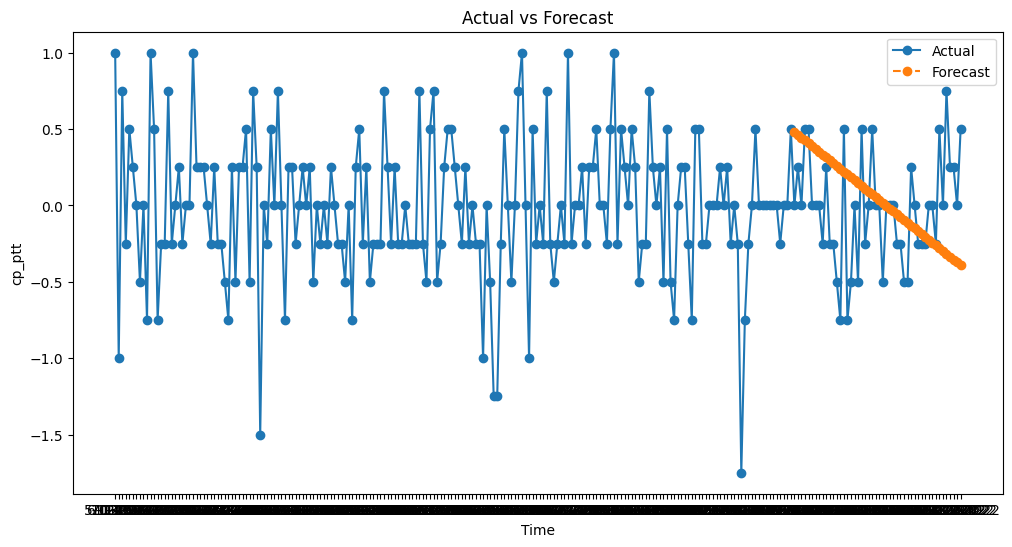

In [ ]:
import matplotlib.pyplot as plt

# สร้างกราฟเปรียบเทียบค่าจริงและค่าพยากรณ์
plt.figure(figsize=(12, 6))
plt.plot(ai['cp_ptt_diff'], label='Actual', marker='o', linestyle='-')
plt.plot(test_data.index, test_data['forecasted_cp_ptt_diff'], label='Forecast', marker='o', linestyle='--')
plt.title('Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('cp_ptt')
plt.xticks(rotation=0)
plt.legend()
plt.show()

#XGBoost Model

In [ ]:
all_data


,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
2,4-1-2022,2568.5625,33.25,60334.1200,38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5-1-2022,2568.5741,33.19,60058.3007,39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6-1-2022,2673.5995,33.55,60010.2140,38.00,71680000.0,6.10,133500.0,1.44,9950000.0
5,7-1-2022,2658.3334,33.62,60369.0806,38.75,59560000.0,6.10,205100.0,1.24,93480000.0
7,10-1-2022,2645.8940,33.62,60563.4042,38.50,34790000.0,6.15,144400.0,1.24,21280000.0
...,...,...,...,...,...,...,...,...,...,...
305,26-12-2022,2811.9714,34.69,62359.0909,32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27-12-2022,2762.4640,34.60,62761.9780,32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28-12-2022,2736.1426,34.78,62746.2502,32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29-12-2022,2723.5554,34.62,62831.4918,32.75,61350000.0,4.88,47900.0,0.88,1050000.0


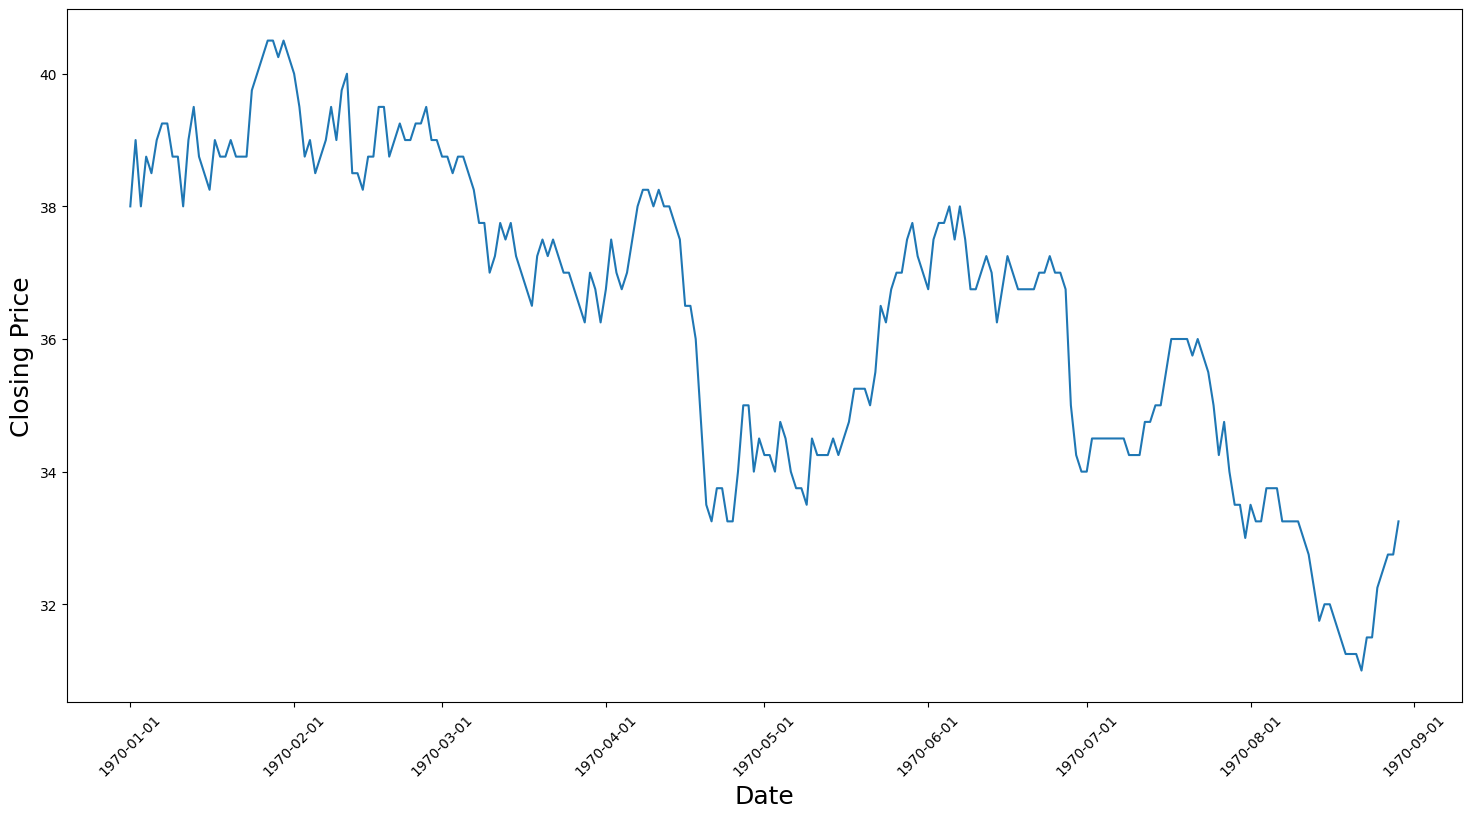

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 9))
plt.plot(range(len(all_data)), all_data['cp_ptt'])
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.show()

In [ ]:
correlation_matrix = all_data.corr()
correlation_matrix

<ipython-input-1142-5b484e1d595a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = all_data.corr()


,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
cp_wti,1.000000,0.051631,0.633348,0.154632,0.025324,-0.267331,-0.020053,0.258085,0.211177
cp_usd,0.051631,1.000000,0.061141,-0.585569,-0.116166,-0.622965,-0.136218,-0.354033,-0.144074
cp_xau,0.633348,0.061141,1.000000,-0.134076,0.008375,-0.512522,-0.112726,0.018376,0.135715
cp_ptt,0.154632,-0.585569,-0.134076,1.000000,-0.054268,0.625622,0.000409,0.726447,0.174842
vol_ptt,0.025324,-0.116166,0.008375,-0.054268,1.000000,0.055487,0.050129,-0.129876,-0.115436
cp_scg,-0.267331,-0.622965,-0.512522,0.625622,0.055487,1.000000,0.326282,0.557767,0.038970
vol_scg,-0.020053,-0.136218,-0.112726,0.000409,0.050129,0.326282,1.000000,0.063774,0.021532
cp_solar,0.258085,-0.354033,0.018376,0.726447,-0.129876,0.557767,0.063774,1.000000,0.336721
vol_solar,0.211177,-0.144074,0.135715,0.174842,-0.115436,0.038970,0.021532,0.336721,1.000000


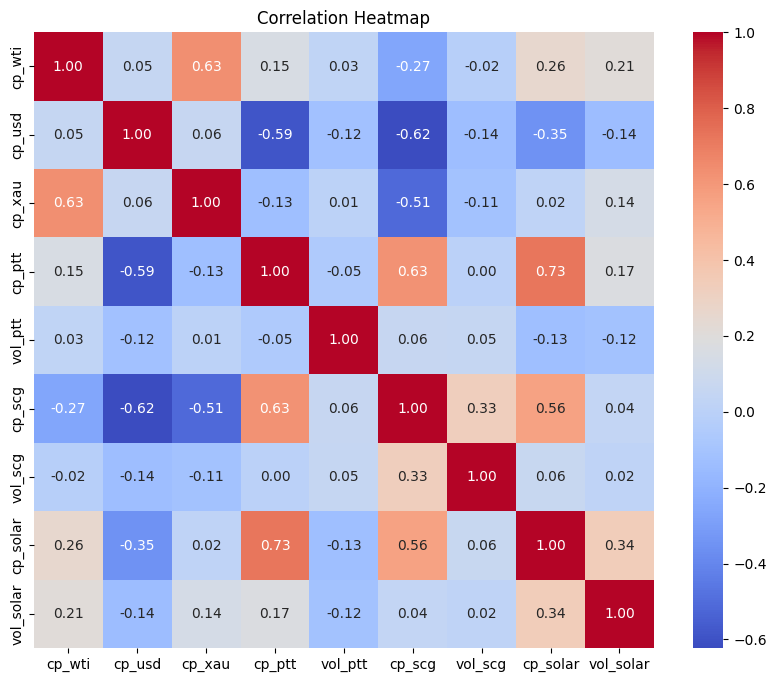

In [ ]:
# Create a heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##หาพารามิเตอร์ที่เหมาะสมกับโมเดล

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import matplotlib.pyplot as pl

X = all_data[['cp_wti',	'cp_usd','cp_xau','vol_ptt']]  # Replace with your independent variables
y = all_data['cp_ptt']  # Replace with your target variable

# Create an XGBoost regressor
model = xgb.XGBRegressor()

# Define a grid of n_estimators values to search
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best n_estimators value
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best n_estimators: {best_n_estimators}")

# Define a grid of max_depth values to search
param_grid = {
    'max_depth': [3, 5, 7, 9]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

Best n_estimators: 50
Best max_depth: 9


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X = all_data[['cp_wti',	'cp_usd','cp_xau','vol_ptt']]  # Replace with your independent variables
y = all_data['cp_ptt']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a list of learning rates to test
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4]  # Adjust the values as needed

# Try different learning rates and evaluate model performance
for learning_rate in learning_rates:
    model = xgb.XGBRegressor(
        n_estimators=50,  # You can adjust other parameters here
        max_depth=9,
        learning_rate=learning_rate,
        objective='reg:squarederror'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Learning Rate: {learning_rate}, Mean Squared Error: {mse}")


Learning Rate: 0.01, Mean Squared Error: 468.01504585953376
Learning Rate: 0.1, Mean Squared Error: 0.7641334342275068
Learning Rate: 0.2, Mean Squared Error: 0.8012366260091415
Learning Rate: 0.3, Mean Squared Error: 1.0164507050191918
Learning Rate: 0.4, Mean Squared Error: 0.6936063135274578


In [ ]:
# Define a list of learning rates to test
#learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4]  # Adjust the values as needed

# Try different learning rates and evaluate model performance
#for learning_rate in learning_rates:
 #      n_estimators=150,  # You can adjust other parameters here
  #      max_depth=9,
   #     learning_rate=learning_rate,
    #    objective='reg:squarederror'
    #)
    #model.fit(X_train, y_train)
    #y_pred = model.predict(X_test)
   # mse = mean_squared_error(y_test, y_pred)
    #print(f"Learning Rate: {learning_rate}, Mean Squared Error: {mse}")

Mean Squared Error: 80.12366260091414


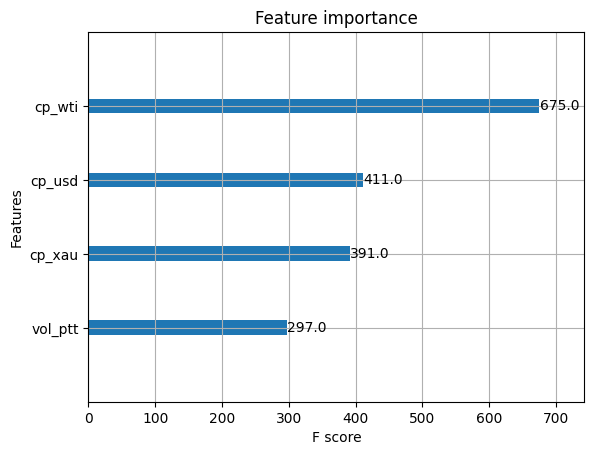

In [ ]:
import matplotlib.pyplot as plt

# Create and train the XGBoost model
model = xgb.XGBRegressor(
    n_estimators=50,
    max_depth=9,
    learning_rate=0.4,
    objective='reg:squarederror'
)

model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse*100}")

# Feature importance analysis (optional)
plot_importance(model)
plt.show()


##กราฟเปรียบเทียบค่าพยากรณ์กับค่าจริง

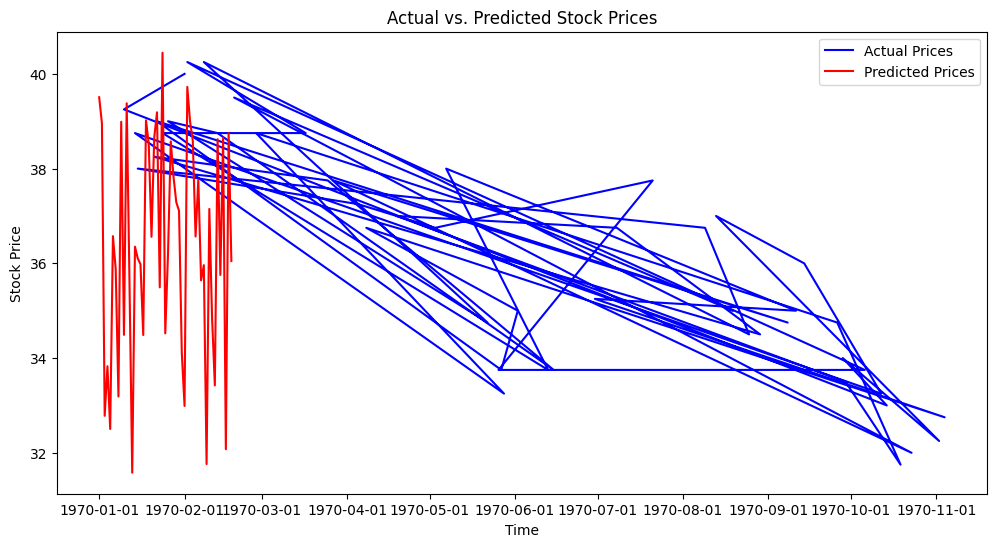

In [ ]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

In [ ]:
import pandas as pd

# Your y_pred and y_test data
y_test = pd.Series(y_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
comparison_df=comparison_df.rename(columns={'y_pred':'Predicted','y_test':'Actual'})
# Print the comparison table
comparison_df.head()


,Predicted,Actual
31,39.506081,40.00
9,38.954777,39.25
286,32.781654,33.00
270,33.827381,34.00
305,32.503754,32.25


## Standardize

In [ ]:
all_data_X = all_data[['cp_wti', 'cp_usd', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg','vol_scg', 'cp_solar', 'vol_solar']]

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit และ Transform ข้อมูล
scaled_data = scaler.fit_transform(all_data_X)

# สร้าง DataFrame ใหม่จากข้อมูลที่ปรับแล้ว
scaled_df = pd.DataFrame(scaled_data, columns=all_data_X.columns)

# แสดงผลลัพธ์
scaled_df

,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,-1.797703,-1.100940,-1.703451,0.700069,0.060415,3.242433,0.362923,3.496903,-0.157981
1,-1.797676,-1.137859,-1.881685,1.131294,0.690430,3.551029,3.807543,3.496903,-0.265913
2,-1.547293,-0.916344,-1.912759,0.700069,0.509425,3.088135,0.186596,2.876057,-0.139845
3,-1.583688,-0.873271,-1.680860,1.023487,0.062627,3.088135,0.441647,1.102213,1.707604
4,-1.613344,-0.873271,-1.555289,0.915681,-0.850508,3.242433,0.225423,1.102213,0.110743
...,...,...,...,...,...,...,...,...,...
236,-1.217412,-0.214877,-0.394920,-1.779472,-0.670978,-0.923611,-0.157154,-2.179400,-0.336467
237,-1.335439,-0.270256,-0.134575,-1.671666,0.845262,-0.800172,-0.066318,-2.002015,-0.327620
238,-1.398189,-0.159498,-0.144739,-1.563860,-0.296434,-0.738453,-0.141124,-2.090708,-0.353457
239,-1.428197,-0.257950,-0.089656,-1.563860,0.128614,-0.676734,-0.118326,-2.090708,-0.336688


In [ ]:
correlation_matrix = scaled_df.corr()
correlation_matrix

,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
cp_wti,1.000000,0.051631,0.633348,0.154632,0.025324,-0.267331,-0.020053,0.258085,0.211177
cp_usd,0.051631,1.000000,0.061141,-0.585569,-0.116166,-0.622965,-0.136218,-0.354033,-0.144074
cp_xau,0.633348,0.061141,1.000000,-0.134076,0.008375,-0.512522,-0.112726,0.018376,0.135715
cp_ptt,0.154632,-0.585569,-0.134076,1.000000,-0.054268,0.625622,0.000409,0.726447,0.174842
vol_ptt,0.025324,-0.116166,0.008375,-0.054268,1.000000,0.055487,0.050129,-0.129876,-0.115436
cp_scg,-0.267331,-0.622965,-0.512522,0.625622,0.055487,1.000000,0.326282,0.557767,0.038970
vol_scg,-0.020053,-0.136218,-0.112726,0.000409,0.050129,0.326282,1.000000,0.063774,0.021532
cp_solar,0.258085,-0.354033,0.018376,0.726447,-0.129876,0.557767,0.063774,1.000000,0.336721
vol_solar,0.211177,-0.144074,0.135715,0.174842,-0.115436,0.038970,0.021532,0.336721,1.000000


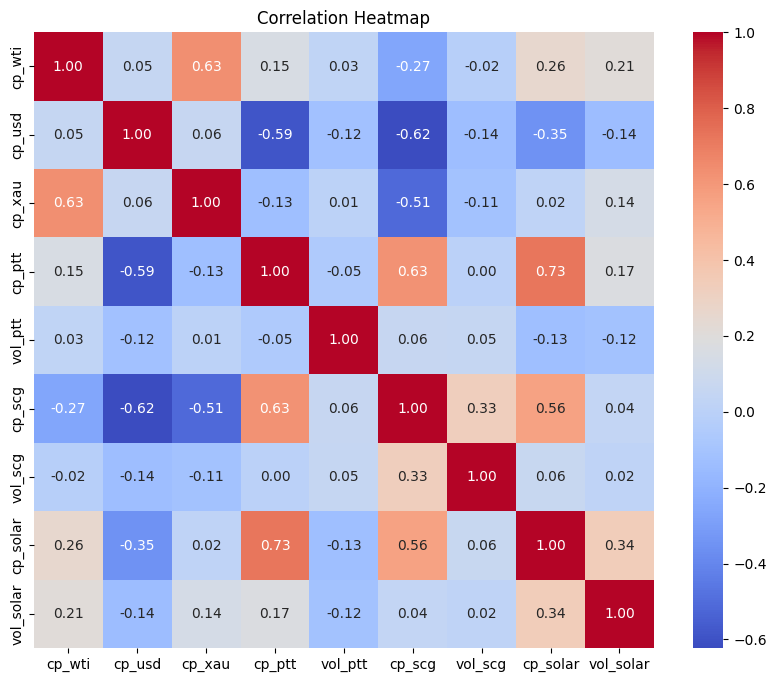

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

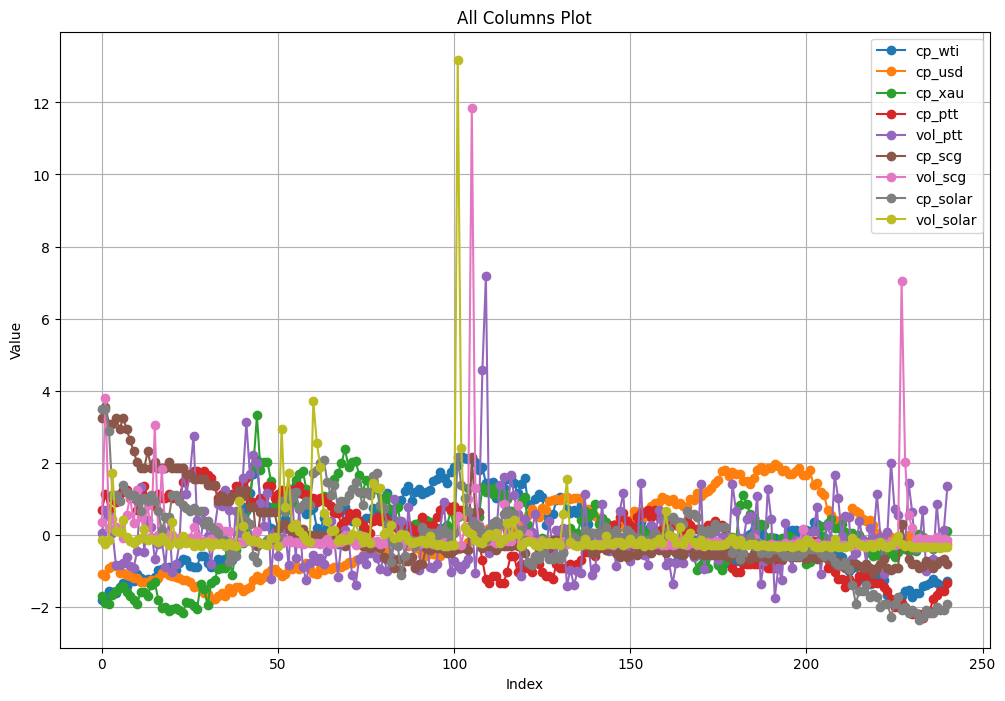

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
for column in scaled_df.columns:
    plt.plot(scaled_df.index, scaled_df[column], marker='o', linestyle='-', label=column)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('All Columns Plot')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import matplotlib.pyplot as pl

X = scaled_df[['cp_wti',	'cp_usd','cp_xau','vol_ptt']]  # Replace with your independent variables
y = scaled_df['cp_ptt']  # Replace with your target variable

# Create an XGBoost regressor
model = xgb.XGBRegressor()

# Define a grid of n_estimators values to search
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best n_estimators value
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best n_estimators: {best_n_estimators}")

# Define a grid of max_depth values to search
param_grid = {
    'max_depth': [3, 5, 7, 9]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

Best n_estimators: 100
Best max_depth: 7


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X = scaled_df[['cp_wti',	'cp_usd','cp_xau','vol_ptt']]  # Replace with your independent variables
y = scaled_df['cp_ptt']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a list of learning rates to test
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4]  # Adjust the values as needed

# Try different learning rates and evaluate model performance
for learning_rate in learning_rates:
    model = xgb.XGBRegressor(
        n_estimators=100,  # You can adjust other parameters here
        max_depth=7,
        learning_rate=learning_rate,
        objective='reg:squarederror'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Learning Rate: {learning_rate}, Mean Squared Error: {mse}")

Learning Rate: 0.01, Mean Squared Error: 0.41713838259045777
Learning Rate: 0.1, Mean Squared Error: 0.20359780402909075
Learning Rate: 0.2, Mean Squared Error: 0.16246854572199526
Learning Rate: 0.3, Mean Squared Error: 0.16126083182857803
Learning Rate: 0.4, Mean Squared Error: 0.22213796790876322


Mean Squared Error: 82.50672140592894


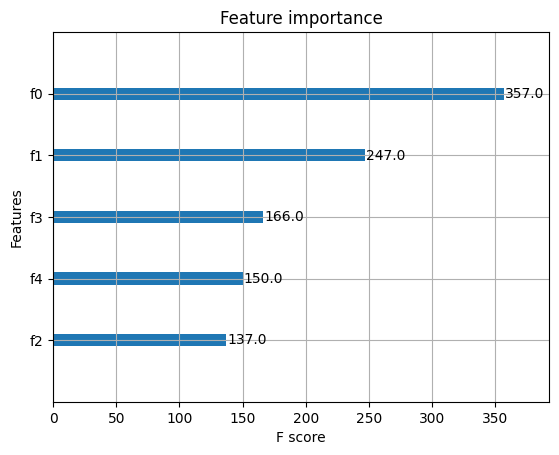

In [ ]:
import matplotlib.pyplot as plt

# Create and train the XGBoost model
model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.3,
    objective='reg:squarederror'
)

model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse*100}")

# Feature importance analysis (optional)
plot_importance(model)
plt.show()


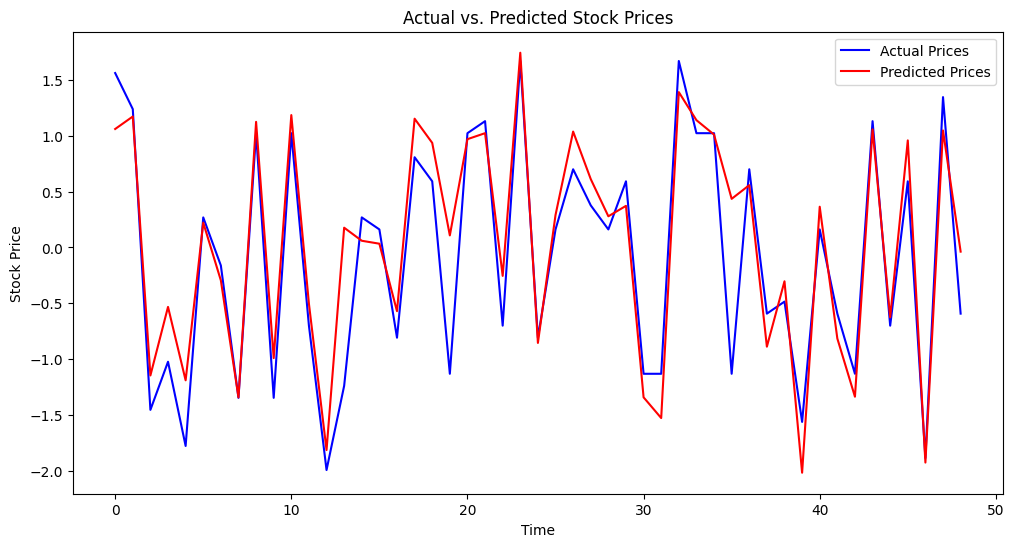

In [ ]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

#ARIMA-GARCH

In [ ]:
ai = all_data[['date','cp_ptt','cp_wti','cp_usd','cp_xau','vol_ptt']]
ai

,date,cp_ptt,cp_wti,cp_usd,cp_xau,vol_ptt
2,4-1-2022,38.00,2568.5625,33.25,60334.1200,59500000.0
3,5-1-2022,39.00,2568.5741,33.19,60058.3007,76590000.0
4,6-1-2022,38.00,2673.5995,33.55,60010.2140,71680000.0
5,7-1-2022,38.75,2658.3334,33.62,60369.0806,59560000.0
7,10-1-2022,38.50,2645.8940,33.62,60563.4042,34790000.0
...,...,...,...,...,...,...
305,26-12-2022,32.25,2811.9714,34.69,62359.0909,39660000.0
306,27-12-2022,32.50,2762.4640,34.60,62761.9780,80790000.0
307,28-12-2022,32.75,2736.1426,34.78,62746.2502,49820000.0
308,29-12-2022,32.75,2723.5554,34.62,62831.4918,61350000.0


In [ ]:
ai.set_index('date', inplace=True)

In [ ]:
!pip install arch
import pandas as pd
import numpy as np
from arch import arch_model
import statsmodels.api as sm

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


# ทำ ADF Test
adf_result = adfuller(ai['cp_ptt'])

# แสดงผลลัพธ์
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])


ADF Statistic: -1.2531437339125961
p-value: 0.6503274228098432
Critical Values: {'1%': -3.4578942529658563, '5%': -2.8736593200231484, '10%': -2.573228767361111}


In [ ]:
# ลบค่าก่อนหน้าเพื่อทำให้ข้อมูล stationary
#ใชการแปลงอนุกรมเวลาให้มีค่าเฉลี่ยคงที่โดยหาผลต่างครั้งที่ d=1
ai['cp_ptt_diff'] = ai['cp_ptt'].diff()
ai.dropna(inplace=True)  # ลบแถวที่มีค่าที่ขาดหาย

# ทำ ADF Test อีกครั้ง
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(ai['cp_ptt_diff'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

ADF Statistic: -15.175035290317654
p-value: 6.312317313857727e-28
Critical Values: {'1%': -3.458010773719797, '5%': -2.8737103617125186, '10%': -2.5732559963936206}


<ipython-input-1185-a9154dd938b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai['cp_ptt_diff'] = ai['cp_ptt'].diff()
<ipython-input-1185-a9154dd938b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai.dropna(inplace=True)  # ลบแถวที่มีค่าที่ขาดหาย


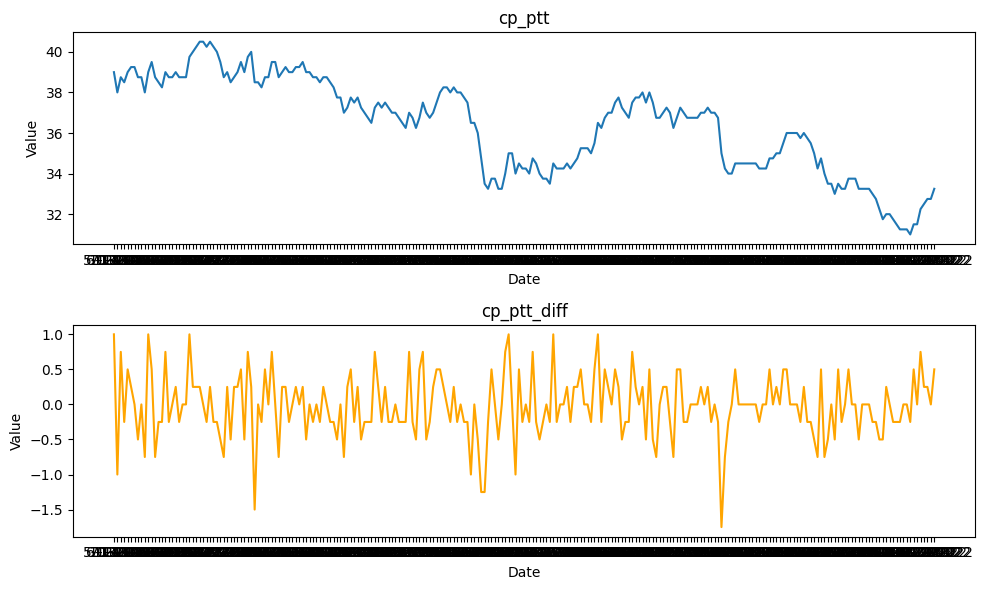

In [ ]:
import matplotlib.pyplot as plt

# สร้าง subplot 2x1
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# วาดกราฟของ 'cp_ptt' ใน subplot แรก
axes[0].plot(ai.index, ai['cp_ptt'], label='cp_ptt')
axes[0].set_title('cp_ptt')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')

# วาดกราฟของ 'cp_ptt_diff' ใน subplot ที่สอง
axes[1].plot(ai.index, ai['cp_ptt_diff'], label='cp_ptt_diff', color='orange')
axes[1].set_title('cp_ptt_diff')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')

# ปรับแต่งรูปร่างและตำแหน่งของ subplot
plt.tight_layout()

# แสดง subplot
plt.show()


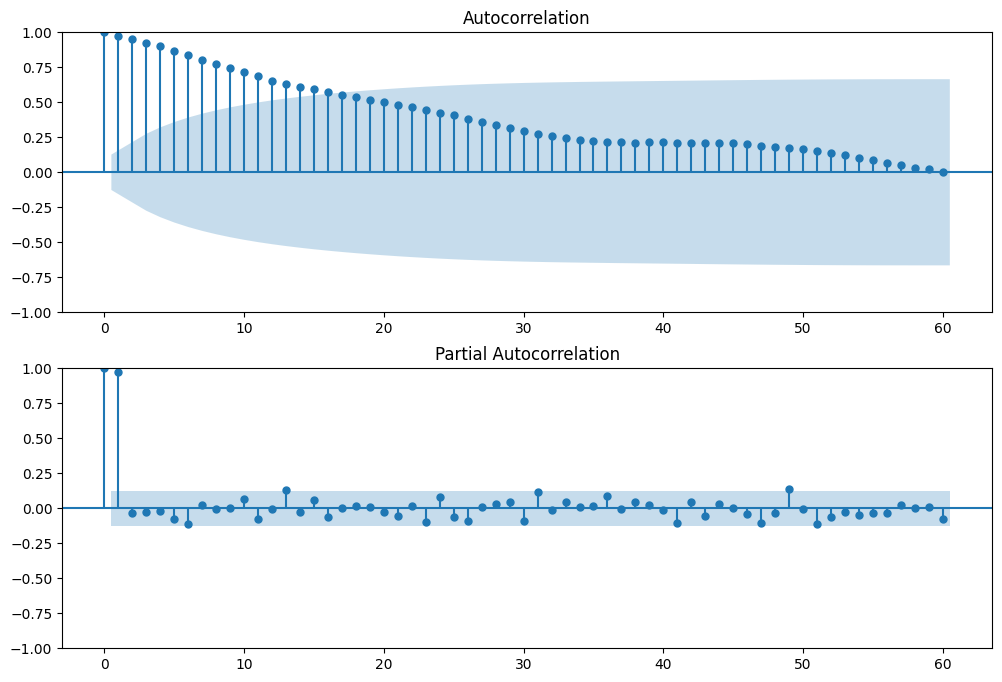

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ทำนายรายละเอียดของพารามิเตอร์ p และ q จาก ACF และ PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(ai['cp_ptt'], lags=60, ax=ax1)
sm.graphics.tsa.plot_pacf(ai['cp_ptt'], lags=60, ax=ax2)
plt.show()


In [ ]:
import itertools
import pandas as pd
import statsmodels.api as sm

# สร้างชุดข้อมูลของคุณ (เปลี่ยนให้เป็นข้อมูลจริง)
data = ai['cp_ptt_diff']

# สร้างเซตของค่า p, d, และ q ที่คุณต้องการทดลอง
p_values = range(1, 3)  # เลือกค่า p จาก 1 ถึง 2
d_values = [1]  # ค่า d ต้องเป็น 1 สำหรับ ARIMA
q_values = range(1, 16)  # เลือกค่า q จาก 1 ถึง 15

# สร้างรายการค่า AIC และพารามิเตอร์ที่เกี่ยวข้อง
aic_values = []
params = []

# วนลูปผสานค่า p, d, และ q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # สร้างแบบจำลอง ARIMA
        model = sm.tsa.ARIMA(data, order=(p, d, q))

        # ปรับโมเดล
        results = model.fit()

        # นับค่า AIC และเก็บค่า AIC และพารามิเตอร์
        aic = results.aic
        aic_values.append(aic)
        params.append((p, d, q))

        print(f'ARIMA({p},{d},{q}) - AIC: {aic}')

    except Exception as e:
        continue

# หาค่า AIC ที่ดีที่สุดและพารามิเตอร์ที่เกี่ยวข้อง
best_aic = min(aic_values)
best_params = params[aic_values.index(best_aic)]

print(f'Best AIC: {best_aic}')
print(f'Best Model (p, d, q): {best_params}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,1) - AIC: 300.7089482399206


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,2) - AIC: 302.3854903789911


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,3) - AIC: 304.3368862091859


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,4) - AIC: 306.32914861474046


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,5) - AIC: 308.27772725178767


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,6) - AIC: 308.1530215317006
ARIMA(1,1,7) - AIC: 310.19271016374955


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,8) - AIC: 311.5290288858406


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,9) - AIC: 313.52904536444794


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,10) - AIC: 315.5226446525314


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,11) - AIC: 315.34226943749826


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/u

ARIMA(1,1,12) - AIC: 309.4929478025973


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/u

ARIMA(1,1,13) - AIC: 302.27016821411434


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/u

ARIMA(1,1,14) - AIC: 304.2603189083753


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/u

ARIMA(1,1,15) - AIC: 305.0791825598312
ARIMA(2,1,1) - AIC: 302.7020944591566


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(2,1,2) - AIC: 304.33622325654324


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(2,1,3) - AIC: 300.43671288120214


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/u

ARIMA(2,1,4) - AIC: 303.3021253892581


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/u

ARIMA(2,1,5) - AIC: 303.6321472983192


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/u

ARIMA(2,1,6) - AIC: 305.1288034606663
ARIMA(2,1,7) - AIC: 306.16520454317134


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(2,1,8) - AIC: 301.9991978382548


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/u

ARIMA(2,1,9) - AIC: 303.8868810675717


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/u

ARIMA(2,1,10) - AIC: 308.29802370121905


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/u

ARIMA(2,1,11) - AIC: 300.5164787104516


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/u

ARIMA(2,1,12) - AIC: 301.9756649915107


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self

ARIMA(2,1,13) - AIC: 303.9791217269604


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/u

ARIMA(2,1,14) - AIC: 303.2333838989549


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,15) - AIC: 305.5880065468424
Best AIC: 300.43671288120214
Best Model (p, d, q): (2, 1, 3)


In [ ]:
# import statsmodels.api as sm
# from statsmodels.tsa.arima.model import ARIMA

# สร้างตัวแบบ ARIMA โดยกำหนดค่า p, d, และ q

# model = ARIMA(ai['cp_ptt_diff'], order=(2,1, 3))

# # ปรับแต่งตัวแบบด้วยข้อมูล
# results = model.fit()

# # แสดงสรุปของโมเดล
# print(results.summary())


In [ ]:
# แบ่งข้อมูลเป็นชุดการฝึกสอนและชุดทดสอบ
data = ai['cp_ptt_diff']
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# สร้างโมเดล ARIMA(2,1,3)
order = (2, 1, 3)
model = ARIMA(train, order=order)
model_fit = model.fit()

# ทำนายค่า cp_ptt ในชุดทดสอบ
arima_pedict= model_fit.forecast(steps=len(test))

# คำนวณค่า MSE
mse = mean_squared_error(test, arima_pedict, squared=True)
print(f'Mean Squared Error (MSE): {mse*100}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

Mean Squared Error (MSE): 12.359231042450979


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


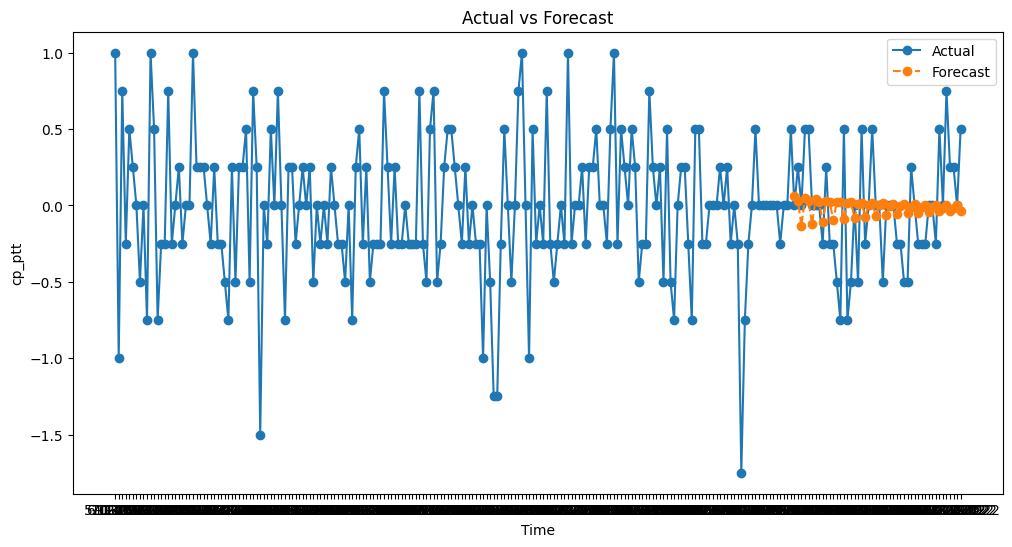

In [ ]:
import matplotlib.pyplot as plt

# สร้างกราฟเปรียบเทียบค่าจริงและค่าพยากรณ์
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual', marker='o', linestyle='-')
plt.plot(test.index, arima_pedict, label='Forecast', marker='o', linestyle='--')
plt.title('Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('cp_ptt')
plt.xticks(rotation=0)
plt.legend()
plt.show()


#LSTM Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
lm = all_data[['date','cp_ptt','cp_wti','cp_usd','cp_xau','vol_ptt']]
lm

,date,cp_ptt,cp_wti,cp_usd,cp_xau,vol_ptt
2,4-1-2022,38.00,2568.5625,33.25,60334.1200,59500000.0
3,5-1-2022,39.00,2568.5741,33.19,60058.3007,76590000.0
4,6-1-2022,38.00,2673.5995,33.55,60010.2140,71680000.0
5,7-1-2022,38.75,2658.3334,33.62,60369.0806,59560000.0
7,10-1-2022,38.50,2645.8940,33.62,60563.4042,34790000.0
...,...,...,...,...,...,...
305,26-12-2022,32.25,2811.9714,34.69,62359.0909,39660000.0
306,27-12-2022,32.50,2762.4640,34.60,62761.9780,80790000.0
307,28-12-2022,32.75,2736.1426,34.78,62746.2502,49820000.0
308,29-12-2022,32.75,2723.5554,34.62,62831.4918,61350000.0


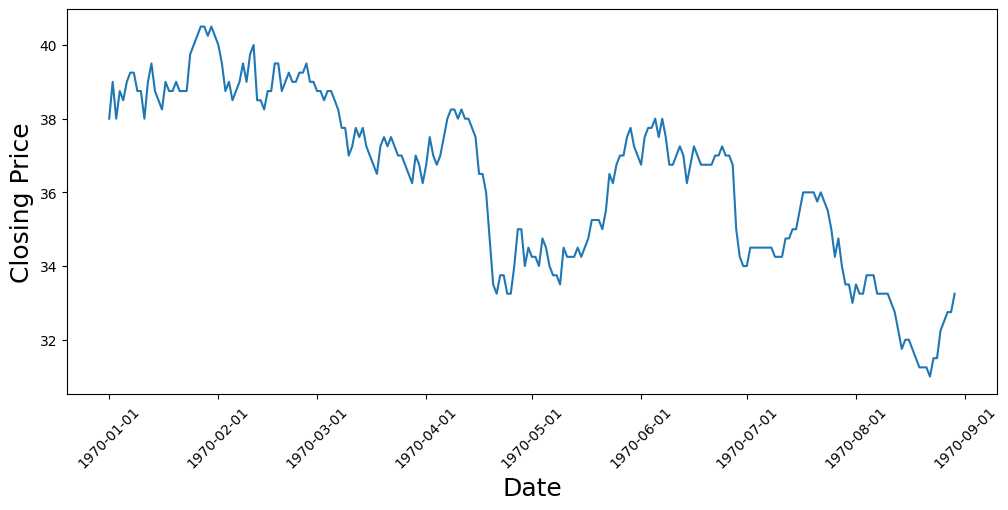

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
plt.plot(range(len(lm)), lm['cp_ptt'])
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# แบ่งข้อมูลเป็นชุด train และ test
train_size = int(len(lm) * 0.8)
train_data, test_data = lm.iloc[:train_size, :], lm.iloc[train_size:, :]

# เลือกตัวแปรต้นและตัวแปรตาม
X_train, y_train = train_data[['cp_ptt','cp_wti','cp_usd','cp_xau','vol_ptt']].values, train_data['cp_ptt'].values
X_test, y_test = test_data[['cp_ptt','cp_wti','cp_usd','cp_xau','vol_ptt']].values, test_data['cp_ptt'].values

# ปรับขนาดข้อมูล
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

def create_lstm_model(neurons=50, input_shape=(3, 1)):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=input_shape, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# กำหนดพารามิเตอร์ที่เราต้องการค้นหา
param_grid = {
    'neurons': [50, 100, 150],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 200]
}

# สร้าง LSTM model ด้วย KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=create_lstm_model, input_shape=(X_train.shape[1], 1))

# ใช้ GridSearchCV ในการค้นหาพารามิเตอร์ที่เหมาะสม
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)
grid_result = grid_search.fit(X_train, y_train)

# แสดงผลลัพธ์ที่ดีที่สุด
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/50


<ipython-input-1207-c377970a5b9e>:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_lstm_model, input_shape=(X_train.shape[1], 1))


1/1 [==============================] - 1s 1s/step - loss: 1533.6771
Epoch 2/50
1/1 [==============================] - 0s 12ms/step - loss: 1533.2451
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 1532.8108
Epoch 4/50
1/1 [==============================] - 0s 14ms/step - loss: 1532.3718
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 1531.9258
Epoch 6/50
1/1 [==============================] - 0s 13ms/step - loss: 1531.4739
Epoch 7/50
1/1 [==============================] - 0s 15ms/step - loss: 1531.0195
Epoch 8/50
1/1 [==============================] - 0s 11ms/step - loss: 1530.5605
Epoch 9/50
1/1 [==============================] - 0s 13ms/step - loss: 1530.0959
Epoch 10/50
1/1 [==============================] - 0s 12ms/step - loss: 1529.6243
Epoch 11/50
1/1 [==============================] - 0s 11ms/step - loss: 1529.1417
Epoch 12/50
1/1 [==============================] - 0s 11ms/step - loss: 1528.6460
Epoch 13/50
1/1 [=====================

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# ข้อมูล DataFrame
x = lm[['cp_wti', 'cp_usd', 'cp_xau', 'vol_ptt']]
y = lm["cp_ptt"]

# แปลงข้อมูลให้อยู่ในรูปแบบ NumPy
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
#กำหนดมีชั้น LSTM มากกว่าหนึ่งชั้นต่อกัน return_sequences=True
#ให้ผลลัพธ์เป็นเวกเตอร์เดียวสำหรับชั้นถัดไป return_sequences=False
#จำนวนฟีเจอร์ xtrain.shape[1], ช่วงเวลาที่ต้องการทำนาย 1
# สร้างโมเดล LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(150, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))
model.summary()


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=32, epochs=200) #epochs กำหนดจำนวนรอบการฝึกทั้งหมด  batch size ขนาดของกลุ่มข้อมูล ในแต่ละรอบการฝึก

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import TimeSeriesSplit
# from keras.models import Sequential
# from keras.layers import LSTM, Dense

# # สร้างฟังก์ชันสำหรับสร้างโมเดล LSTM
# def create_lstm_model(units_lstm1=200, units_lstm2=100, units_dense=50):
#     model = Sequential()
#     model.add(LSTM(units=units_lstm1, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
#     model.add(LSTM(units=units_lstm2, return_sequences=False))
#     model.add(Dense(units=units_dense))
#     model.add(Dense(units=1))
#     model.compile(optimizer='adam', loss='mean_squared_error')
#     return model

# # กำหนดค่าที่คุณต้องการทดสอบ
# param_grid = {
#     'units_lstm1': [100, 200],
#     'units_lstm2': [100, 150],
#     'units_dense': [25, 50],
#     'batch_size': [1, 32],
#     'epochs': [50, 60],
# }

# # ใช้ Time Series Cross Validation
# tscv = TimeSeriesSplit(n_splits=3)  # ใช้จำนวน Fold ตามที่คุณต้องการ

# # สร้าง GridSearchCV เพื่อค้นหา parameter ที่ดีที่สุด
# model = KerasRegressor(build_fn=create_lstm_model, verbose=0)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=2)
# grid_result = grid.fit(xtrain, ytrain)

# # แสดงผลลัพธ์ parameter ที่ดีที่สุด
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [ ]:
from sklearn.metrics import mean_squared_error
# ทำนายค่าจากชุดทดสอบ
y_pred = model.predict(xtest)
y_pred

In [ ]:
#from sklearn.metrics import mean_squared_error

# ทำนายค่าจากชุดทดสอบ
#y_pred = model.predict(xtest)

# คำนวณค่า MSE
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error (MSE): {mse*100}")


In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
#plt.plot(range(len(lm)), lm['cp_ptt'])
plt.plot(ytest, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.show()


In [ ]:
# import arch
# import pandas as pd
# import numpy as np

# # แบ่งข้อมูลเป็นชุดการฝึกอบรมและชุดทดสอบ
# train_size = int(len(ai) * 0.8)
# train_data = ai.iloc[:train_size]
# test_data = ai.iloc[train_size:]

# # สร้างและฟิตโมเดล GARCH(2,3) ด้วยข้อมูลการฝึกอบรม
# garch_order = (1, 1)
# model_garch = arch.arch_model(train_data['cp_ptt'], x=train_data[['cp_wti', 'cp_usd', 'cp_xau', 'vol_ptt']],
#                              vol='Garch', p=garch_order[0], q=garch_order[1])
# results_garch = model_garch.fit()

# # ใช้โมเดล GARCH ที่ฟิตแล้วเพื่อทำนายค่าความผิดพลาดสำหรับชุดทดสอบ
# predictions = results_garch.forecast(start=0, horizon=len(test_data))
# forecasted_residuals = predictions.mean.values



# # แสดงชุดการทดสอบที่มีการพยากรณ์
# # คำนวณค่า 'cp_ptt_diff' สำหรับชุดทดสอบ
# forecasted_residuals = np.resize(forecasted_residuals, len(test_data))  # ปรับขนาดค่าความผิดพลาดให้มีความยาวเท่ากับชุดทดสอบ
# test_data['forecasted_cp_ptt'] = test_data['cp_ptt'].iloc[-1] + np.cumsum(forecasted_residuals)

# # แสดงชุดการทดสอบที่มีการพยากรณ์
# gg = pd.DataFrame(test_data[['cp_wti', 'cp_usd', 'cp_xau', 'vol_ptt', 'cp_ptt', 'forecasted_cp_ptt']])
# gg

In [ ]:
ai.tail()

,cp_ptt,cp_wti,cp_usd,cp_xau,vol_ptt,cp_ptt_diff
date,,,,,,
26-12-2022,32.25,2811.9714,34.69,62359.0909,39660000.0,0.75
27-12-2022,32.50,2762.4640,34.60,62761.9780,80790000.0,0.25
28-12-2022,32.75,2736.1426,34.78,62746.2502,49820000.0,0.25
29-12-2022,32.75,2723.5554,34.62,62831.4918,61350000.0,0.00
30-12-2022,33.25,2787.8355,34.61,63142.4840,94400000.0,0.50


In [ ]:
import arch
import pandas as pd
import numpy as np

# แบ่งข้อมูลเป็นชุดการฝึกอบรมและชุดทดสอบ
train_size = int(len(ai) * 0.8)
train_data = ai.iloc[:train_size]
test_data = ai.iloc[train_size:]

# สร้างและฟิตโมเดล GARCH(2,3) ด้วยข้อมูลการฝึกอบรม
garch_order = (2, 3)
model_garch = arch.arch_model(train_data['cp_ptt_diff'], x=train_data[['cp_wti', 'cp_usd', 'cp_xau', 'vol_ptt']],
                             vol='Garch', p=garch_order[0], q=garch_order[1])
results_garch = model_garch.fit()

# ใช้โมเดล GARCH ที่ฟิตแล้วเพื่อทำนายค่าความผิดพลาดสำหรับชุดทดสอบ
predictions = results_garch.forecast(start=0, horizon=len(test_data))
forecasted_residuals = predictions.mean.values



# แสดงชุดการทดสอบที่มีการพยากรณ์
# คำนวณค่า 'cp_ptt_diff' สำหรับชุดทดสอบ
forecasted_residuals = np.resize(forecasted_residuals, len(test_data))  # ปรับขนาดค่าความผิดพลาดให้มีความยาวเท่ากับชุดทดสอบ
test_data['forecasted_cp_ptt_diff'] = test_data['cp_ptt_diff'].iloc[-1] + np.cumsum(forecasted_residuals)

# แสดงชุดการทดสอบที่มีการพยากรณ์
test_data = pd.DataFrame(test_data[['cp_wti', 'cp_usd', 'cp_xau', 'vol_ptt', 'cp_ptt_diff', 'forecasted_cp_ptt_diff']])
test_data

Iteration:      1,   Func. Count:      9,   Neg. LLF: 325204299.1221205
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1101740411.2674713
Iteration:      3,   Func. Count:     30,   Neg. LLF: 600.4042466236147
Iteration:      4,   Func. Count:     40,   Neg. LLF: 123.50741116736513
Iteration:      5,   Func. Count:     49,   Neg. LLF: 123.24369413416119
Iteration:      6,   Func. Count:     57,   Neg. LLF: 123.12143871499731
Iteration:      7,   Func. Count:     65,   Neg. LLF: 122.85068361793796
Iteration:      8,   Func. Count:     73,   Neg. LLF: 122.62027031479809
Iteration:      9,   Func. Count:     81,   Neg. LLF: 122.79147788906687
Iteration:     10,   Func. Count:     90,   Neg. LLF: 122.6071683149487
Iteration:     11,   Func. Count:     98,   Neg. LLF: 122.60667182574387
Iteration:     12,   Func. Count:    106,   Neg. LLF: 122.6064489673051
Iteration:     13,   Func. Count:    114,   Neg. LLF: 122.60643461030173
Iteration:     14,   Func. Count:    122,   Neg. LLF: 1

/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
<ipython-input-1193-be0c463efd67>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['forecasted_cp_ptt_diff'] = test_data['cp_ptt_diff'].iloc[-1] + np.cumsum(forecasted_residuals)


,cp_wti,cp_usd,cp_xau,vol_ptt,cp_ptt_diff,forecasted_cp_ptt_diff
date,,,,,,
21-10-2022,3268.0488,37.93,62837.1138,24070000.0,0.00,0.481424
25-10-2022,3253.9312,37.96,62729.6592,67019999.0,0.25,0.462847
26-10-2022,3365.3340,37.80,62917.7220,41590000.0,0.00,0.444271
27-10-2022,3379.1818,37.79,62842.5026,32740000.0,0.50,0.425695
28-10-2022,3380.6800,37.90,62222.7040,53730000.0,0.50,0.407118
31-10-2022,3305.7840,38.05,62140.2160,52150000.0,0.00,0.388542
1-11-2022,3372.4464,37.74,62176.6500,60360000.0,0.00,0.369966
2-11-2022,3382.7775,37.75,61717.0975,59860000.0,0.00,0.351389
3-11-2022,3362.2428,37.94,61809.9510,43600000.0,-0.25,0.332813


In [ ]:
from sklearn.metrics import mean_squared_error

# คำนวณค่า MSE
mse = mean_squared_error(test_data['cp_ptt_diff'], test_data['forecasted_cp_ptt_diff'], squared=True)
print(f'Mean Squared Error (MSE): {mse*100}')


Mean Squared Error (MSE): 21.16310586375073


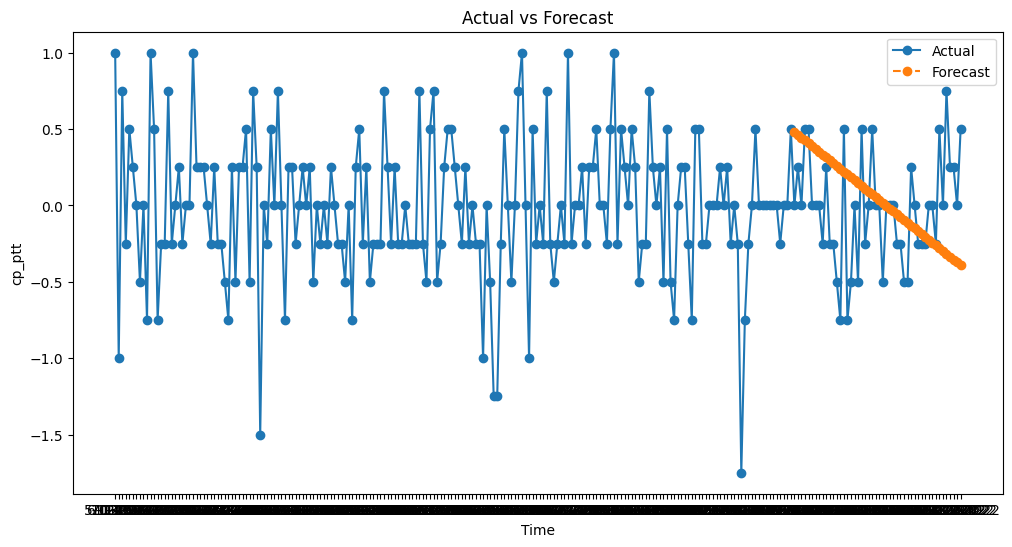

In [ ]:
import matplotlib.pyplot as plt

# สร้างกราฟเปรียบเทียบค่าจริงและค่าพยากรณ์
plt.figure(figsize=(12, 6))
plt.plot(ai['cp_ptt_diff'], label='Actual', marker='o', linestyle='-')
plt.plot(test_data.index, test_data['forecasted_cp_ptt_diff'], label='Forecast', marker='o', linestyle='--')
plt.title('Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('cp_ptt')
plt.xticks(rotation=0)
plt.legend()
plt.show()